In [57]:
!pip install tensorflow


In [58]:
!pip install keras

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [60]:
from keras.preprocessing.image import ImageDataGenerator

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [62]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_d33bf0b9a94b4a5f87c1c8a7092dcba3 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_d33bf0b9a94b4a5f87c1c8a7092dcba3 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_d33bf0b9a94b4a5f87c1c8a7092dcba3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MCikh1z2NsJqThCCqPD51mcHydF5q_mLHeY-49JQcTqy',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_d33bf0b9a94b4a5f87c1c8a7092dcba3)

streaming_body_3 = client_d33bf0b9a94b4a5f87c1c8a7092dcba3.get_object(Bucket='malariadetection-donotdelete-pr-ucjp48pvb4zetd', Key='cell_images.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [63]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [64]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/cell_images/train', 
                                          target_size=(128,128), batch_size=32, class_mode="categorical")


x_test=train_datagen.flow_from_directory('/home/wsuser/work/cell_images/test', 
                                          target_size=(128,128), batch_size=32, class_mode="categorical")

Found 20584 images belonging to 2 classes.
Found 6862 images belonging to 2 classes.


In [65]:
model = Sequential()
#add cnn layer
model.add(Convolution2D(32,(5,5),input_shape=(128,128,3),activation="relu"))
#add maxpooling layer
model.add(MaxPooling2D(2,2))
#add flatten layer
model.add(Flatten())
#add hidden layer
model.add(Dense(units=128,activation="relu"))
#add output layer
model.add(Dense(units=2, activation="softmax"))
print(model.summary())
#configure the learning process
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
# steps_per_epoch=no.of images in train data/batch_size
#20586/32=645
# validation steps=no.of images in test data/batch _size
#6862/32=215
#fit the model
model.fit(x_train,steps_per_epoch= 644, epochs=3, validation_data=x_test,validation_steps= 215)
model.save("Malaria_model.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 15,747,842
Trainable params: 15,747,842
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
644/644 [==============================] - 494s 766ms/step - loss: 0.7430 - accuracy: 0.5847 

In [66]:
!pip install watson-machine-learning-client


In [67]:
!tar -zcvf malaria_model_watson.tgz Malaria_model.h5

Malaria_model.h5


In [18]:
ls -1

cell_images/
Malaria_model.h5
malaria_model_watson.tgz


In [68]:
!pip install --upgrade "ibm-watson>=5.2.3"

In [69]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com", "apikey": "p2SGaqewlKzFjwFL3FfIeFcm490SP-Hkb9B4uLSGjZRX"}
client=APIClient(wml_credentials)

In [70]:
def guide_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [71]:
space_uid=guide_from_space_name(client,'malariamodel_deploy')
print("Space UID =" + space_uid)

Space UID =d14d7eb4-ca2c-48a1-85c2-a1e55b92f37d


In [72]:
client.set.default_space(space_uid)

'SUCCESS'

In [73]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [158]:
software_spec_uid=client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [170]:
model_details=client.repository.store_model(model="malaria_model_watson.tgz",meta_props={client.repository.ModelMetaNames.NAME:"Malaria_model",client.repository.ModelMetaNames.TYPE:"tensorflow_2.4",client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id=client.repository.get_model_uid(model_details)

In [171]:
model_id

'033996a2-3d39-415e-b152-fcc943ece4e4'

In [172]:
client.repository.download(model_id,"malaria_modelv4_watson.tgz")

Successfully saved model content to file: 'malaria_modelv4_watson.tgz'


'/home/wsuser/work/malaria_modelv4_watson.tgz'

In [174]:
pwd

'/home/wsuser/work'

In [175]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [176]:
model=load_model("Malaria_model.h5")

In [177]:

streaming_body_7 = client_d33bf0b9a94b4a5f87c1c8a7092dcba3.get_object(Bucket='malariadetection-donotdelete-pr-ucjp48pvb4zetd', Key='p1.png')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


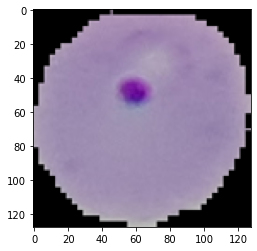

In [178]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

imgo = Image.open(streaming_body_7)
newsize = (128, 128)
im1 = imgo.resize(newsize)
im_array = np.asarray(im1)

plt.imshow(im_array)
plt.show()


In [179]:
import numpy as np
#x=image.img_to_array(img)
x=np.expand_dims(im_array,axis=0)

In [180]:
pred=model.predict_classes(x)
pred[0]

0

In [181]:
index=["Parasitized","Uninfected"]
a=index[pred[0]]
print(a)

Parasitized
